In [10]:
import pickle
import pandas as pd
import numpy as np


# 데이터 저장
df = pd.read_pickle('merge_df.pickle')

In [11]:
from collections import defaultdict
from tqdm import tqdm
blank_list = defaultdict(list)
for i in tqdm(df.columns):
    for j in range(len(df)):
        if df.loc[j,i] == '':
            blank_list[i].append(j)
            df.loc[j,i] = np.nan

100%|███████████████████████████████████████████| 16/16 [07:01<00:00, 26.35s/it]


In [12]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842085 entries, 0 to 1842084
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   MAKETXT        1842060 non-null  object
 1   MODELTXT       1842060 non-null  object
 2   YEARTXT        1842060 non-null  object
 3   COMPNAME       1841934 non-null  object
 4   INJURED        1842085 non-null  object
 5   DEATHS         1842085 non-null  object
 6   DATEA          1842085 non-null  object
 7   LDATE          1842085 non-null  object
 8   MILES          1061447 non-null  object
 9   OCCURENCES     972373 non-null   object
 10  CDESCR         1842046 non-null  object
 11  PURCH_DT       380750 non-null   object
 12  ORIG_EQUIP_YN  13584 non-null    object
 13  MANUF_DT       5649 non-null     object
 14  PROD_TYPE      1842065 non-null  object
 15  label          1842085 non-null  int64 
dtypes: int64(1), object(15)
memory usage: 224.9+ MB


In [14]:
del df['ORIG_EQUIP_YN']
del df['MANUF_DT']


In [15]:
df_t = df[df['label'] == 1]

In [16]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842085 entries, 0 to 1842084
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MAKETXT     1842060 non-null  object
 1   MODELTXT    1842060 non-null  object
 2   YEARTXT     1842060 non-null  object
 3   COMPNAME    1841934 non-null  object
 4   INJURED     1842085 non-null  object
 5   DEATHS      1842085 non-null  object
 6   DATEA       1842085 non-null  object
 7   LDATE       1842085 non-null  object
 8   MILES       1061447 non-null  object
 9   OCCURENCES  972373 non-null   object
 10  CDESCR      1842046 non-null  object
 11  PURCH_DT    380750 non-null   object
 12  PROD_TYPE   1842065 non-null  object
 13  label       1842085 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 196.8+ MB


In [17]:
del df['PURCH_DT']

In [18]:
df.dropna(subset=['COMPNAME','MAKETXT','MODELTXT','YEARTXT','CDESCR','PROD_TYPE'],inplace=True)

In [19]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841880 entries, 0 to 1842084
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MAKETXT     1841880 non-null  object
 1   MODELTXT    1841880 non-null  object
 2   YEARTXT     1841880 non-null  object
 3   COMPNAME    1841880 non-null  object
 4   INJURED     1841880 non-null  object
 5   DEATHS      1841880 non-null  object
 6   DATEA       1841880 non-null  object
 7   LDATE       1841880 non-null  object
 8   MILES       1061334 non-null  object
 9   OCCURENCES  972298 non-null   object
 10  CDESCR      1841880 non-null  object
 11  PROD_TYPE   1841880 non-null  object
 12  label       1841880 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 196.7+ MB


In [161]:
df[df['label']==1].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71271 entries, 22 to 1842031
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MAKETXT     71271 non-null  object
 1   MODELTXT    71271 non-null  object
 2   YEARTXT     71271 non-null  object
 3   COMPNAME    71271 non-null  object
 4   INJURED     71271 non-null  object
 5   DEATHS      71271 non-null  object
 6   DATEA       71271 non-null  object
 7   LDATE       71271 non-null  object
 8   MILES       42160 non-null  object
 9   OCCURENCES  33746 non-null  object
 10  CDESCR      71271 non-null  object
 11  PROD_TYPE   71271 non-null  object
 12  label       71271 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 7.6+ MB


In [20]:
for i in df[df['OCCURENCES']==df['OCCURENCES']].index:
    df.loc[i,'OCCURENCES'] = int(df.loc[i,'OCCURENCES'])
    

In [21]:
ocr_mean = df[df['OCCURENCES']==df['OCCURENCES']]['OCCURENCES'].mean()# 횟수의 대체 값을 구하기 위해 평균치 계산 

In [22]:
df_ocr =df.dropna(subset = ['OCCURENCES']) 

In [23]:
df_oc = df.copy()

In [24]:
df_oc['OCCURENCES'] = df['OCCURENCES'].fillna(ocr_mean)

In [122]:
temp = df.copy()
del temp['OCCURENCES']
# del temp['MILES']

In [124]:
# df_miles = df_t[df_t['MILES'].isnull()==False]
# df_miles['MILES'] = df_miles['MILES'].astype(float)

In [125]:
import matplotlib.pyplot as plt

x,y = [],[]
for key,value in temp['PROD_TYPE'].value_counts().items():
    x.append(key)
    y.append(value)

In [126]:
temp['PROD_TYPE'].value_counts()

V    1775693
T      38526
C      14079
E      13582
Name: PROD_TYPE, dtype: int64

<BarContainer object of 4 artists>

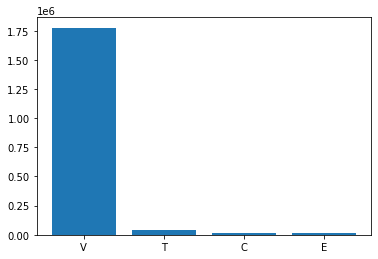

In [127]:
plt.bar(x,y)

In [128]:
temp_1 = temp[temp['label']==1]
temp_1['DEATHS'].value_counts()

0    71163
1       91
2       11
3        3
9        2
4        1
Name: DEATHS, dtype: int64

In [129]:
temp['DEATHS'].value_counts()

0     1837835
1        3178
2         552
3         135
4          58
5          29
10         29
9          15
99         10
6           6
7           6
12          5
15          4
45          4
11          3
18          2
95          2
50          2
88          1
17          1
8           1
16          1
40          1
Name: DEATHS, dtype: int64

In [130]:
temp.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841880 entries, 0 to 1842084
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   MAKETXT    1841880 non-null  object
 1   MODELTXT   1841880 non-null  object
 2   YEARTXT    1841880 non-null  object
 3   COMPNAME   1841880 non-null  object
 4   INJURED    1841880 non-null  object
 5   DEATHS     1841880 non-null  object
 6   DATEA      1841880 non-null  object
 7   LDATE      1841880 non-null  object
 8   MILES      1061334 non-null  object
 9   CDESCR     1841880 non-null  object
 10  PROD_TYPE  1841880 non-null  object
 11  label      1841880 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 247.2+ MB


In [131]:
temp.reset_index(drop=True)

,MAKETXT,MODELTXT,YEARTXT,COMPNAME,INJURED,DEATHS,DATEA,LDATE,MILES,CDESCR,PROD_TYPE,label
0,VOLVO,760,1987,ENGINE AND ENGINE COOLING:COOLING SYSTEM:RADIA...,0,0,19950103,19950103,NaN,RADIATOR FAILED @ HIGHWAY SPEED OBSTRUCTING DR...,V,0
1,FORD,THUNDERBIRD,1992,"FUEL SYSTEM, GASOLINE:DELIVERY",0,0,19950103,19950103,NaN,"FUEL LEAKED FROM FUEL TANK AREA, EMITTING STRO...",V,0
2,KIA,SEPHIA,1994,POWER TRAIN:AUTOMATIC TRANSMISSION,0,0,19950103,19950103,NaN,SHIFTED INTO REVERSE VEHICLE JERKED VIOLENTLY....,V,0
3,DODGE,600,1987,"FUEL SYSTEM, GASOLINE:STORAGE:TANK ASSEMBLY",0,0,19950103,19950103,NaN,FUEL TANK ; LEAKS BECAUSE OF RUST GAS LEAK BY ...,V,0
4,DODGE,CARAVAN,1991,SEATS,0,0,19950103,19950103,NaN,"DRIVER SIDE SEAT FRAME BROKE IN TWO, CAUSING S...",V,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1841875,TESLA,MODEL X,2016,UNKNOWN OR OTHER,0,0,20220921,20220921,NaN,On Tuesday September 13th 2022 morning around ...,V,0
1841876,TESLA,MODEL X,2016,VEHICLE SPEED CONTROL,0,0,20220921,20220921,NaN,On Tuesday September 13th 2022 morning around ...,V,0
1841877,HONDA,RIDGELINE,2018,UNKNOWN OR OTHER,0,0,20220921,20220921,NaN,What component or system failed or malfunction...,V,0
1841878,HONDA,RIDGELINE,2018,ELECTRICAL SYSTEM,0,0,20220921,20220921,NaN,What component or system failed or malfunction...,V,0


In [134]:
temp.reset_index(drop=True,inplace=True)

In [135]:
from tqdm import tqdm

for i in tqdm(range(len(temp))):
    cp = temp.loc[i,'COMPNAME']
    
    if ':' in cp:
        cp = cp.split(':')[:-1]
#         print(cp)
        temp.loc[i,'COMPNAME'] = ' '.join(cp)
    

In [136]:
temp['COMPNAME']

0          ENGINE AND ENGINE COOLING COOLING SYSTEM
1                             FUEL SYSTEM, GASOLINE
2                                       POWER TRAIN
3                     FUEL SYSTEM, GASOLINE STORAGE
4                                             SEATS
                             ...                   
1841875                            UNKNOWN OR OTHER
1841876                       VEHICLE SPEED CONTROL
1841877                            UNKNOWN OR OTHER
1841878                           ELECTRICAL SYSTEM
1841879                              LANE DEPARTURE
Name: COMPNAME, Length: 1841880, dtype: object

In [138]:
temp = temp[temp['COMPNAME']!='NONE']

In [139]:
temp = temp.reset_index(drop=True)

In [140]:
temp

,MAKETXT,MODELTXT,YEARTXT,COMPNAME,INJURED,DEATHS,DATEA,LDATE,MILES,CDESCR,PROD_TYPE,label
0,VOLVO,760,1987,ENGINE AND ENGINE COOLING COOLING SYSTEM,0,0,19950103,19950103,NaN,RADIATOR FAILED @ HIGHWAY SPEED OBSTRUCTING DR...,V,0
1,FORD,THUNDERBIRD,1992,"FUEL SYSTEM, GASOLINE",0,0,19950103,19950103,NaN,"FUEL LEAKED FROM FUEL TANK AREA, EMITTING STRO...",V,0
2,KIA,SEPHIA,1994,POWER TRAIN,0,0,19950103,19950103,NaN,SHIFTED INTO REVERSE VEHICLE JERKED VIOLENTLY....,V,0
3,DODGE,600,1987,"FUEL SYSTEM, GASOLINE STORAGE",0,0,19950103,19950103,NaN,FUEL TANK ; LEAKS BECAUSE OF RUST GAS LEAK BY ...,V,0
4,DODGE,CARAVAN,1991,SEATS,0,0,19950103,19950103,NaN,"DRIVER SIDE SEAT FRAME BROKE IN TWO, CAUSING S...",V,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1841869,TESLA,MODEL X,2016,UNKNOWN OR OTHER,0,0,20220921,20220921,NaN,On Tuesday September 13th 2022 morning around ...,V,0
1841870,TESLA,MODEL X,2016,VEHICLE SPEED CONTROL,0,0,20220921,20220921,NaN,On Tuesday September 13th 2022 morning around ...,V,0
1841871,HONDA,RIDGELINE,2018,UNKNOWN OR OTHER,0,0,20220921,20220921,NaN,What component or system failed or malfunction...,V,0
1841872,HONDA,RIDGELINE,2018,ELECTRICAL SYSTEM,0,0,20220921,20220921,NaN,What component or system failed or malfunction...,V,0


In [141]:
df_miles = temp[temp['MILES'].isnull()==False]
df_miles['MILES'] = df_miles['MILES'].astype(float)

/var/folders/cx/2_hdnzk567b6wtk4d2wq64yw0000gn/T/ipykernel_57338/279209479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miles['MILES'] = df_miles['MILES'].astype(float)


<AxesSubplot:xlabel='COMPNAME'>

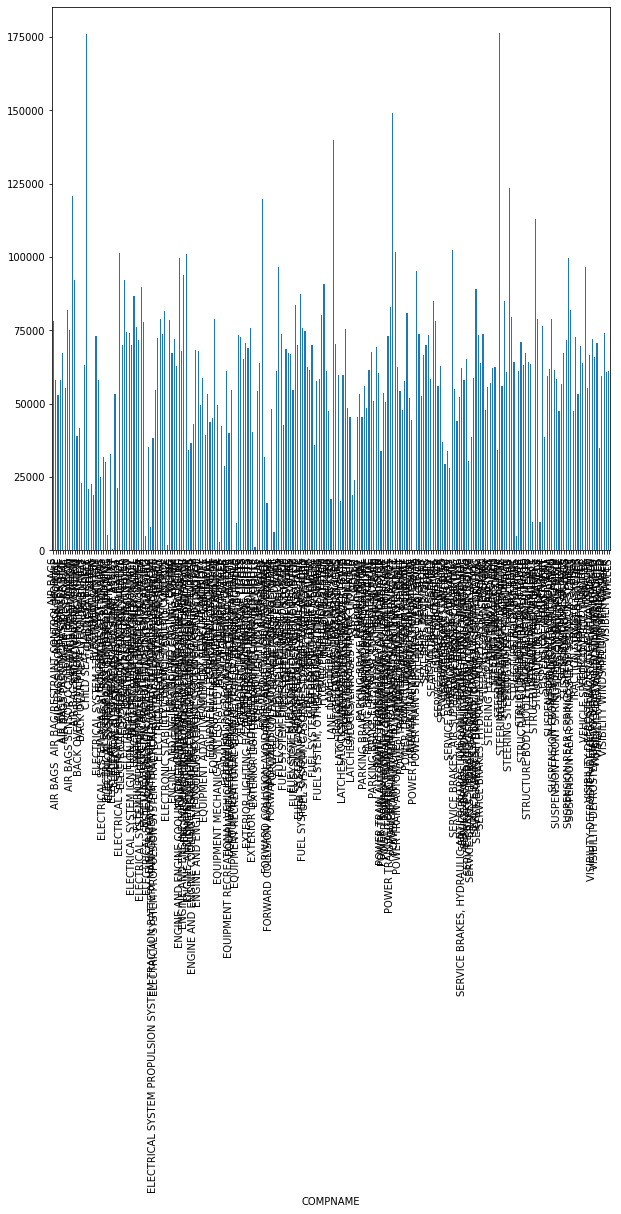

In [142]:
plt.figure(figsize=(10,10))
df_miles.groupby(['COMPNAME']).mean()['MILES'].plot(kind='bar') # 장치별 기본 주행거리 . 평균값으로 대체해도 괜찮아보임(?)te

In [143]:
miles_mean = int(df_miles['MILES'].mean())

In [144]:
temp['MILES'].fillna(miles_mean,inplace=True)

In [145]:
temp

,MAKETXT,MODELTXT,YEARTXT,COMPNAME,INJURED,DEATHS,DATEA,LDATE,MILES,CDESCR,PROD_TYPE,label
0,VOLVO,760,1987,ENGINE AND ENGINE COOLING COOLING SYSTEM,0,0,19950103,19950103,70883,RADIATOR FAILED @ HIGHWAY SPEED OBSTRUCTING DR...,V,0
1,FORD,THUNDERBIRD,1992,"FUEL SYSTEM, GASOLINE",0,0,19950103,19950103,70883,"FUEL LEAKED FROM FUEL TANK AREA, EMITTING STRO...",V,0
2,KIA,SEPHIA,1994,POWER TRAIN,0,0,19950103,19950103,70883,SHIFTED INTO REVERSE VEHICLE JERKED VIOLENTLY....,V,0
3,DODGE,600,1987,"FUEL SYSTEM, GASOLINE STORAGE",0,0,19950103,19950103,70883,FUEL TANK ; LEAKS BECAUSE OF RUST GAS LEAK BY ...,V,0
4,DODGE,CARAVAN,1991,SEATS,0,0,19950103,19950103,70883,"DRIVER SIDE SEAT FRAME BROKE IN TWO, CAUSING S...",V,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1841869,TESLA,MODEL X,2016,UNKNOWN OR OTHER,0,0,20220921,20220921,70883,On Tuesday September 13th 2022 morning around ...,V,0
1841870,TESLA,MODEL X,2016,VEHICLE SPEED CONTROL,0,0,20220921,20220921,70883,On Tuesday September 13th 2022 morning around ...,V,0
1841871,HONDA,RIDGELINE,2018,UNKNOWN OR OTHER,0,0,20220921,20220921,70883,What component or system failed or malfunction...,V,0
1841872,HONDA,RIDGELINE,2018,ELECTRICAL SYSTEM,0,0,20220921,20220921,70883,What component or system failed or malfunction...,V,0


In [146]:
temp['CDESCR'] = temp['CDESCR'].str.lower()

In [177]:
temp['COMPNAME'].value_counts()

    


ELECTRICAL SYSTEM                                                       175615
POWER TRAIN                                                             158917
AIR BAGS                                                                138640
STEERING                                                                111031
ENGINE                                                                  107719
                                                                         ...  
ELECTRICAL SYSTEM PROPULSION SYSTEM  CABLES                                  1
POWER TRAIN SHIFT LINKAGE/CABLE/ROD                                          1
EQUIPMENT ADAPTIVE/MOBILITY WHEELCHAIR LIFT/RAMP                             1
VISIBILITY GLASS, SIDE/REAR                                                  1
ENGINE AND ENGINE COOLING ENGINE OTHER FUEL TYPES TURBO/SUPERCHARGER         1
Name: COMPNAME, Length: 262, dtype: int64

In [178]:
tp = temp[temp['COMPNAME'].str.startswith('POWER TRAIN')]

In [182]:
tp['COMPNAME'].value_counts()

POWER TRAIN                                                   158917
POWER TRAIN AUTOMATIC TRANSMISSION                              7380
POWER TRAIN DRIVELINE                                           4884
POWER TRAIN AUTOMATIC TRANSMISSION LEVER AND LINKAGE            2234
POWER TRAIN AXLE ASSEMBLY AXLE SHAFT                             786
POWER TRAIN AXLE ASSEMBLY                                        774
POWER TRAIN CLUTCH ASSEMBLY                                      713
POWER TRAIN MANUAL TRANSMISSION                                  398
POWER TRAIN AUTOMATIC TRANSMISSION INTERNAL                       41
POWER TRAIN AUTOMATIC TRANSMISSION CONTROL MODULE                 12
POWER TRAIN AUTOMATIC TRANSMISSION INTERNAL SHAFT                  5
POWER TRAIN AUTOMATIC TRANSMISSION INTERNAL CLUTCHES/BANDS         5
POWER TRAIN AUTOMATIC TRANSMISSION COOLER/RADIATOR                 5
POWER TRAIN MANUAL TRANSMISSION INTERNAL                           3
POWER TRAIN CLUTCH ASSEMBLY LINKAG

# 빈도수 기준으로 장치 선정


- ELECTRICAL SYSTEM 

- POWER TRAIN  

- AIR BAGS    

- STEERING 

- ENGINE


In [185]:
# dt = temp[temp['label']== 1]

In [193]:
temp.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841874 entries, 0 to 1841873
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   MAKETXT    1841874 non-null  object
 1   MODELTXT   1841874 non-null  object
 2   YEARTXT    1841874 non-null  object
 3   COMPNAME   1841874 non-null  object
 4   INJURED    1841874 non-null  object
 5   DEATHS     1841874 non-null  object
 6   DATEA      1841874 non-null  object
 7   LDATE      1841874 non-null  object
 8   MILES      1841874 non-null  object
 9   CDESCR     1841874 non-null  object
 10  PROD_TYPE  1841874 non-null  object
 11  label      1841874 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 168.6+ MB
